# Bostion 주택가격 예측

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [7]:
df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/boston_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ Encore Prac/boston_test_data.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [8]:
X = df.drop('medv', axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mean_squared_error(y_test, lr_pred)

26.831961437429637

In [13]:
print("가중치(계수, 기울기 파라미터 W) :", lr.coef_)
print("편향(절편 파라미터 b) :", lr.intercept_)
print("훈련세트 점수: {:.2f}".format( lr.score(X_train, y_train) ))
print("테스트세트 점수: {:.2f}".format( lr.score(X_test, y_test) ))
print('MSE :', mean_squared_error(y_test, lr_pred))

가중치(계수, 기울기 파라미터 W) : [-1.18675632e-01  4.89083571e-02 -2.54842808e-02  1.24881127e+00
 -1.36760092e+01  3.71332730e+00 -9.95653992e-03 -1.47384785e+00
  2.72549447e-01 -1.30703523e-02 -9.14049949e-01  8.04610884e-03
 -4.96105247e-01]
편향(절편 파라미터 b) : 35.85473301825593
훈련세트 점수: 0.75
테스트세트 점수: 0.74
MSE : 26.831961437429637


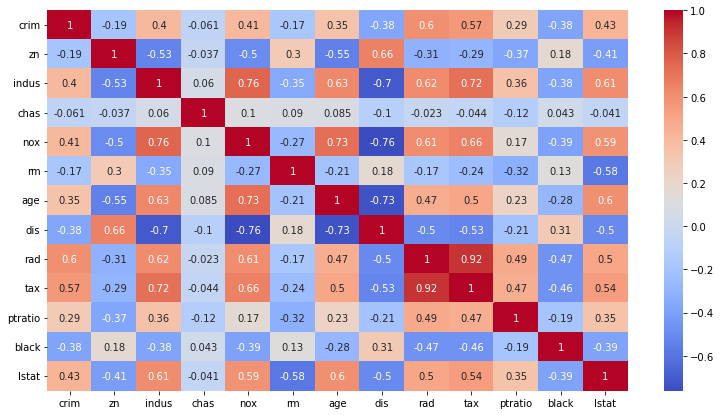

In [17]:
plt.figure(figsize=(13,7))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

In [18]:
X = df.drop(['medv','chas', 'rad'], axis=1)
y = df['medv']

In [19]:
df_test.drop(['chas', 'rad'], axis=1, inplace=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [22]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_scaled = sc.transform(X)
df_test_scaled = sc.transform(df_test)

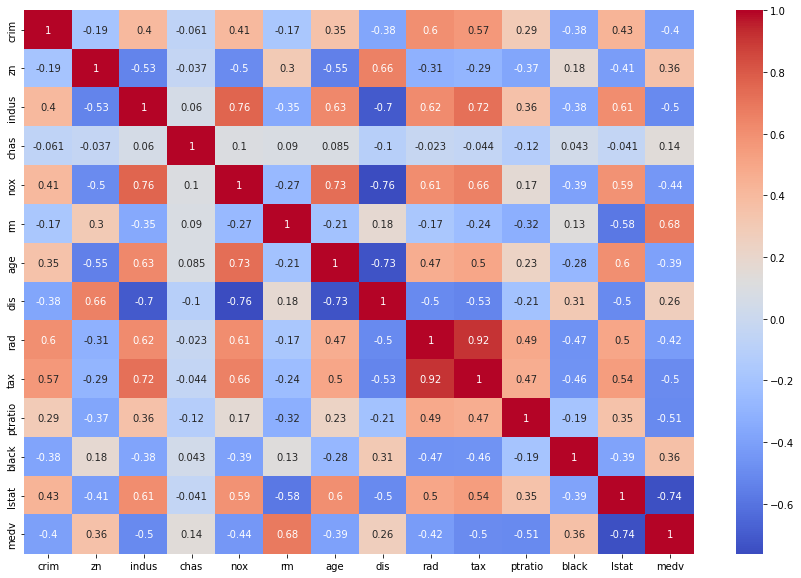

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
df_test_poly = poly.fit_transform(df_test_scaled)
X_trn, X_val, y_trn, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=19)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_trn, y_trn)
lr_pred = lr.predict(X_val)
print('mse: ', mean_squared_error(y_val, lr_pred))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_trn, y_trn)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_val, y_val)))

mse:  23.604162516664232
훈련 세트 점수: 0.92
테스트 세트 점수: 0.78


## Regularization (규제)

### Ridge

In [44]:
from sklearn.linear_model import Ridge
for i in [0, 5, 10, 15, 20, 30]:
  ridge = Ridge(alpha=i)
  ridge.fit(X_trn, y_trn)
  rg_pred = ridge.predict(X_val)
  print(f'alpha = {i}')
  print('mse:', mean_squared_error(y_val, rg_pred ))
  print("훈련 세트 점수: {:.2f}".format( ridge.score(X_trn, y_trn)))
  print("테스트 세트 점수: {:.2f}".format( ridge.score(X_val, y_val)))
  print('-'*50)

alpha = 0
mse: 23.98898274739347
훈련 세트 점수: 0.92
테스트 세트 점수: 0.77
--------------------------------------------------
alpha = 5
mse: 26.978526009278916
훈련 세트 점수: 0.92
테스트 세트 점수: 0.74
--------------------------------------------------
alpha = 10
mse: 27.06187637295238
훈련 세트 점수: 0.92
테스트 세트 점수: 0.74
--------------------------------------------------
alpha = 15
mse: 27.07979436132474
훈련 세트 점수: 0.92
테스트 세트 점수: 0.74
--------------------------------------------------
alpha = 20
mse: 27.073729783938813
훈련 세트 점수: 0.92
테스트 세트 점수: 0.74
--------------------------------------------------
alpha = 30
mse: 27.036935259888516
훈련 세트 점수: 0.92
테스트 세트 점수: 0.74
--------------------------------------------------


In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_trn, y_trn)
rd_pred = ridge.predict(X_val)
print(mean_squared_error(y_val, rd_pred))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_trn, y_trn)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_val, y_val)))

25.425589247598246
훈련 세트 점수: 0.92
테스트 세트 점수: 0.78


In [46]:
# Kaggle 제출 파일
ridge.fit(X_poly, y)
rd_pred = ridge.predict(df_test_poly)

result = pd.DataFrame([df_test.index, rd_pred ], index=['id', 'price']).T
result.id = result.id.astype('int64')
result.to_csv('submission.csv', index=False)

### Lasso

In [48]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_trn, y_trn)
rd_pred = lasso.predict(X_val)
print(mean_squared_error(y_val, rd_pred))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_trn, y_trn)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_val, y_val)))

29.460327191198893
훈련 세트 점수: 0.92
테스트 세트 점수: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+03, tolerance: 2.293e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


* alpha를 0부터 높이면서 각 변수들의 weight가 어떻게 변하는지 확인

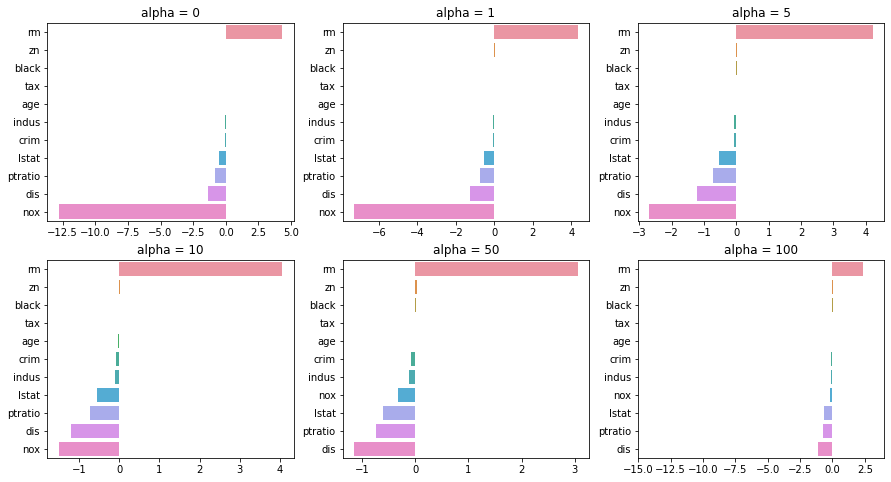

In [49]:
from sklearn.linear_model import Ridge
fig = plt.figure(figsize=(15,8))
for i in range(6):
    globals()[f'ax{i+1}'] = fig.add_subplot(2, 3, i+1)
for idx, alpha in enumerate([0, 1, 5, 10, 50, 100]):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
     # feature별 importance 매핑
    f_i1 = {}
    f_i2 = {}
    for name, value in zip(X.columns, ridge.coef_) :
        f_i1[name] = value
        result1 = sorted(f_i1.items(), key=lambda x:x[1], reverse=True)
    for i, j in result1:
        f_i2[i] = j
    sns.barplot(x=list(f_i2.values()), y=list(f_i2.keys()), ax=globals()[f'ax{idx+1}'])
    globals()[f'ax{idx+1}'].set_title(f'alpha = {alpha}')
    plt.xlim(-15, 4)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.094e+03, tolerance: 3.147e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, 

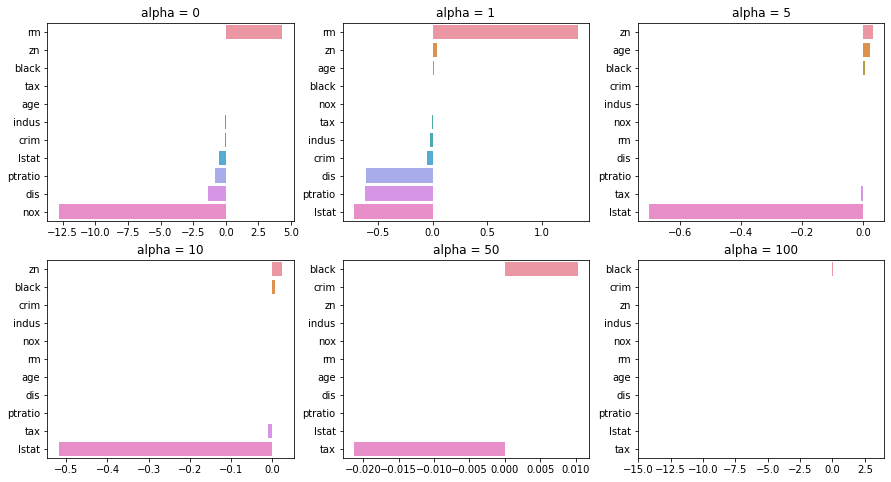

In [33]:
from sklearn.linear_model import Lasso
fig = plt.figure(figsize=(15,8))
for i in range(6):
  globals()[f'ax{i+1}'] = fig.add_subplot(2, 3, i+1)
for idx, alpha in enumerate([0, 1, 5, 10, 50, 100]):
  lasso= Lasso(alpha=alpha)
  lasso.fit(X, y)
  f_i1 = {}
  f_i2 = {}
  for name, value in zip(X.columns, lasso.coef_) :
      f_i1[name] = value
      result1 = sorted(f_i1.items(), key=lambda x:x[1], reverse=True)
  for i, j in result1:
      f_i2[i] = j
  sns.barplot(x=list(f_i2.values()), y=list(f_i2.keys()), ax=globals()[f'ax{idx+1}'])
  globals()[f'ax{idx+1}'].set_title(f'alpha = {alpha}')
  plt.xlim(-15, 4)
plt.show()

### Elasticnet

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
df_test_poly = poly.fit_transform(df_test_scaled)
X_trn, X_val, y_trn, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=19)

In [51]:
from sklearn.linear_model import ElasticNet
for i in [0, 1, 5, 10, 15, 20, 30]:
  ela = ElasticNet(alpha=i, l1_ratio=0.2)
  ela.fit(X_trn, y_trn)
  ela_pred = ela.predict(X_val)
  print(f'alpha = {i}')
  print('mse:', mean_squared_error(y_val, ela_pred ))
  print("훈련 세트 점수: {:.2f}".format(ela.score(X_trn, y_trn)))
  print("테스트 세트 점수: {:.2f}".format(ela.score(X_val, y_val)))
  print('-'*50)

alpha = 0
mse: 23.6995296901799
훈련 세트 점수: 0.92
테스트 세트 점수: 0.77
--------------------------------------------------
alpha = 1
mse: 33.70446822180032
훈련 세트 점수: 0.79
테스트 세트 점수: 0.68
--------------------------------------------------
alpha = 5
mse: 58.48198787969108
훈련 세트 점수: 0.53
테스트 세트 점수: 0.44
--------------------------------------------------
alpha = 10
mse: 78.32456109163304
훈련 세트 점수: 0.33
테스트 세트 점수: 0.26
--------------------------------------------------
alpha = 15
mse: 90.00621555334193
훈련 세트 점수: 0.21
테스트 세트 점수: 0.14
--------------------------------------------------
alpha = 20
mse: 97.28729740084653
훈련 세트 점수: 0.13
테스트 세트 점수: 0.08
--------------------------------------------------
alpha = 30
mse: 104.07456114026242
훈련 세트 점수: 0.04
테스트 세트 점수: 0.01
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.673e+02, tolerance: 2.293e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg,

In [52]:
ela = ElasticNet(alpha=0.1, l1_ratio=0)
ela.fit(X_trn, y_trn)
ela.fit(X_poly, y)
ela_pred = ela.predict(df_test_poly)

result = pd.DataFrame([df_test.index, ela_pred ], index=['id', 'price']).T
result.id = result.id.astype('int64')
result.to_csv('submission.csv', index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.603e+03, tolerance: 2.293e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.483e+03, tolerance: 3.147e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

In [53]:
lasso = Lasso(alpha=1)
lasso.fit(X_trn, y_trn)
lasso.fit(X_poly, y)
la_pred = lasso.predict(df_test_poly)

result = pd.DataFrame([df_test.index, la_pred], index=['id', 'price']).T
result.id = result.id.astype('int64')
result.to_csv('submission.csv', index=False)